# Ireland House Price Analysis & Prediction 

Link to Data Source : https://www.kaggle.com/datasets/adnankhalid007/ireland-house-properties-dataset-2024

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ireland-house-properties-dataset-2024.csv')
df.head()

,Title,Price,Number of Bedrooms,Number of Bathrooms,Property Type,Floor Area (m2),BER Rating,Latitude,Longitude,Listing Views,Area,County,Features,Date of Construction
0,"'Horizons', Banna East, Ardfert, Banna, Co. Ke...",499000,4,6,Detached,247.0,B3,52.359776,-9.797407,3558.0,banna-kerry,Kerry,"Sea/Mountain/Countryside Views, Equal distance...",NaN
1,"Ivella, Rectory Road, Enniscorthy, Co. Wexford...",925000,4,3,End of Terrace,262.0,SI_666,52.504937,-6.562804,5231.0,enniscorthy-wexford,Wexford,Exceptionally well-presented heritage property...,NaN
2,"Grey's Corner, Ferrybank, Co. Wexford, Y35XNP4",895000,5,2,Detached,265.0,B3,52.348600,-6.456929,14011.0,ferrybank-wexford,Wexford,Overlooking the River Slaney Estuary & Wexford...,2007.0
3,"Lindon Lodge, Luddenmore, Ballyneety, Co. Lime...",445000,5,2,Detached,0.5,D1,52.570841,-8.535804,2422.0,ballyneety-limerick,Limerick,"Built in 1978, Circa 192 sq.m., Stands on Circ...",NaN
4,"Ballard, Barna, Co. Galway, H91P22T",1250000,4,4,Detached,333.0,D2,53.257378,-9.134137,19535.0,barna-galway,Galway,NaN,1978.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 14257 non-null  object 
 1   Price                 14259 non-null  object 
 2   Number of Bedrooms    14289 non-null  object 
 3   Number of Bathrooms   14289 non-null  int64  
 4   Property Type         14259 non-null  object 
 5   Floor Area (m2)       11575 non-null  float64
 6   BER Rating            11149 non-null  object 
 7   Latitude              14259 non-null  float64
 8   Longitude             14259 non-null  float64
 9   Listing Views         14259 non-null  float64
 10  Area                  14003 non-null  object 
 11  County                14003 non-null  object 
 12  Features              9174 non-null   object 
 13  Date of Construction  6782 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.5+ MB


# Data Exploration

In [4]:
df.isnull().sum()

Title                     32
Price                     30
Number of Bedrooms         0
Number of Bathrooms        0
Property Type             30
Floor Area (m2)         2714
BER Rating              3140
Latitude                  30
Longitude                 30
Listing Views             30
Area                     286
County                   286
Features                5115
Date of Construction    7507
dtype: int64

In [5]:
df['Price'].describe()

count                    14259
unique                     857
top       Price on Application
freq                       983
Name: Price, dtype: object

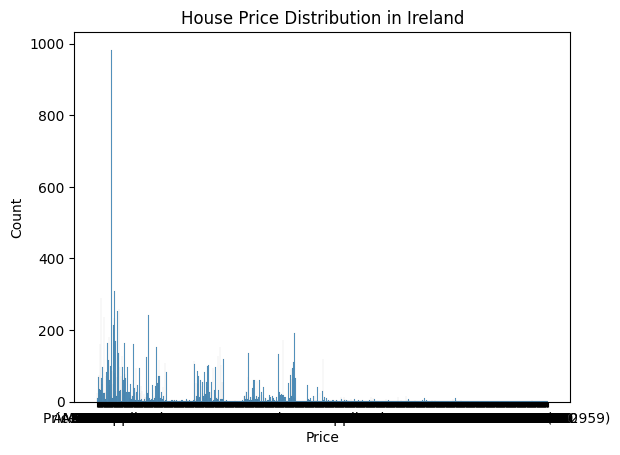

<Figure size 1400x600 with 0 Axes>

In [6]:
# Price distribution
sns.histplot(df['Price'].dropna(), kde=False)
plt.title('House Price Distribution in Ireland')
plt.figure(figsize=(14,6))
plt.show()

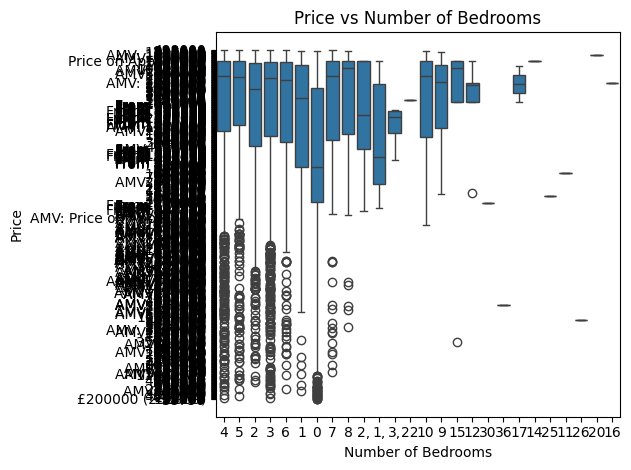

In [7]:
# Price vs Number of Bedrooms
sns.boxplot(x='Number of Bedrooms', y='Price', data=df)
plt.title('Price vs Number of Bedrooms')
plt.tight_layout()
plt.show()

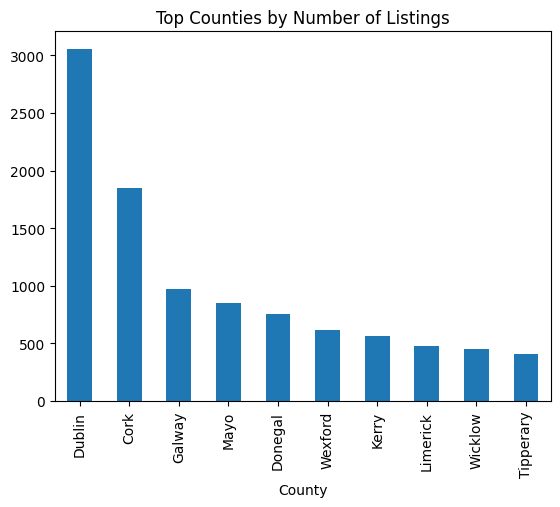

In [8]:
# Top counties by number of listings
df['County'].value_counts().head(10).plot(kind='bar')
plt.title('Top Counties by Number of Listings')
plt.show()

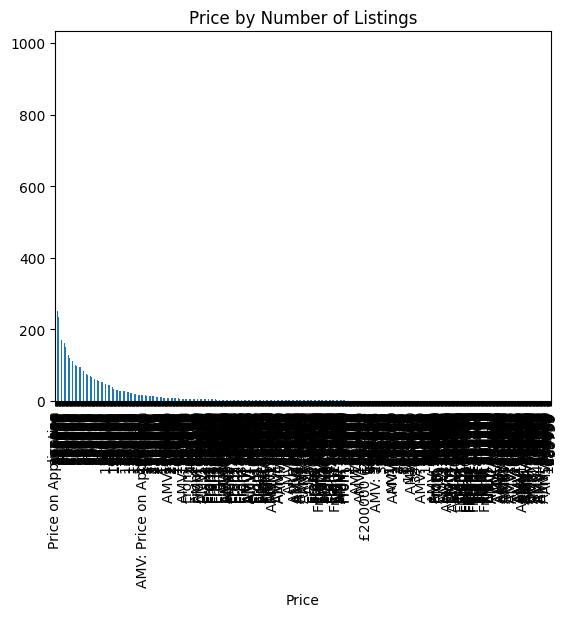

In [9]:
# Price by number of listings
df['Price'].value_counts().plot(kind='bar')
plt.title('Price by Number of Listings')
plt.show()

We can see that the generated plots require cleaning and preprocessing... Specially the 'Price' column

# Data Cleaning / Preprocessing

In [10]:
# Finding all the null values in the dataset that require cleaning
df.isnull().sum()

Title                     32
Price                     30
Number of Bedrooms         0
Number of Bathrooms        0
Property Type             30
Floor Area (m2)         2714
BER Rating              3140
Latitude                  30
Longitude                 30
Listing Views             30
Area                     286
County                   286
Features                5115
Date of Construction    7507
dtype: int64

In [11]:
# Clean 'Price' column
df['Price'] = (
    df['Price'].astype(str)
               .str.replace(r'\D', '', regex=True)
               .replace('', pd.NA)
)

df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype('Int64')  # or np.int64


In [12]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Ensures numeric
df = df.dropna(subset=['Price'])  # Drop remaining NaNs

In [13]:
# Remove outliers above 4 million
df = df[df['Price'] < 4e6] # Make changes here to change the outlier threshold

In [14]:
# Remove Rows where Price = 0
df = df[df['Price'] != 0]

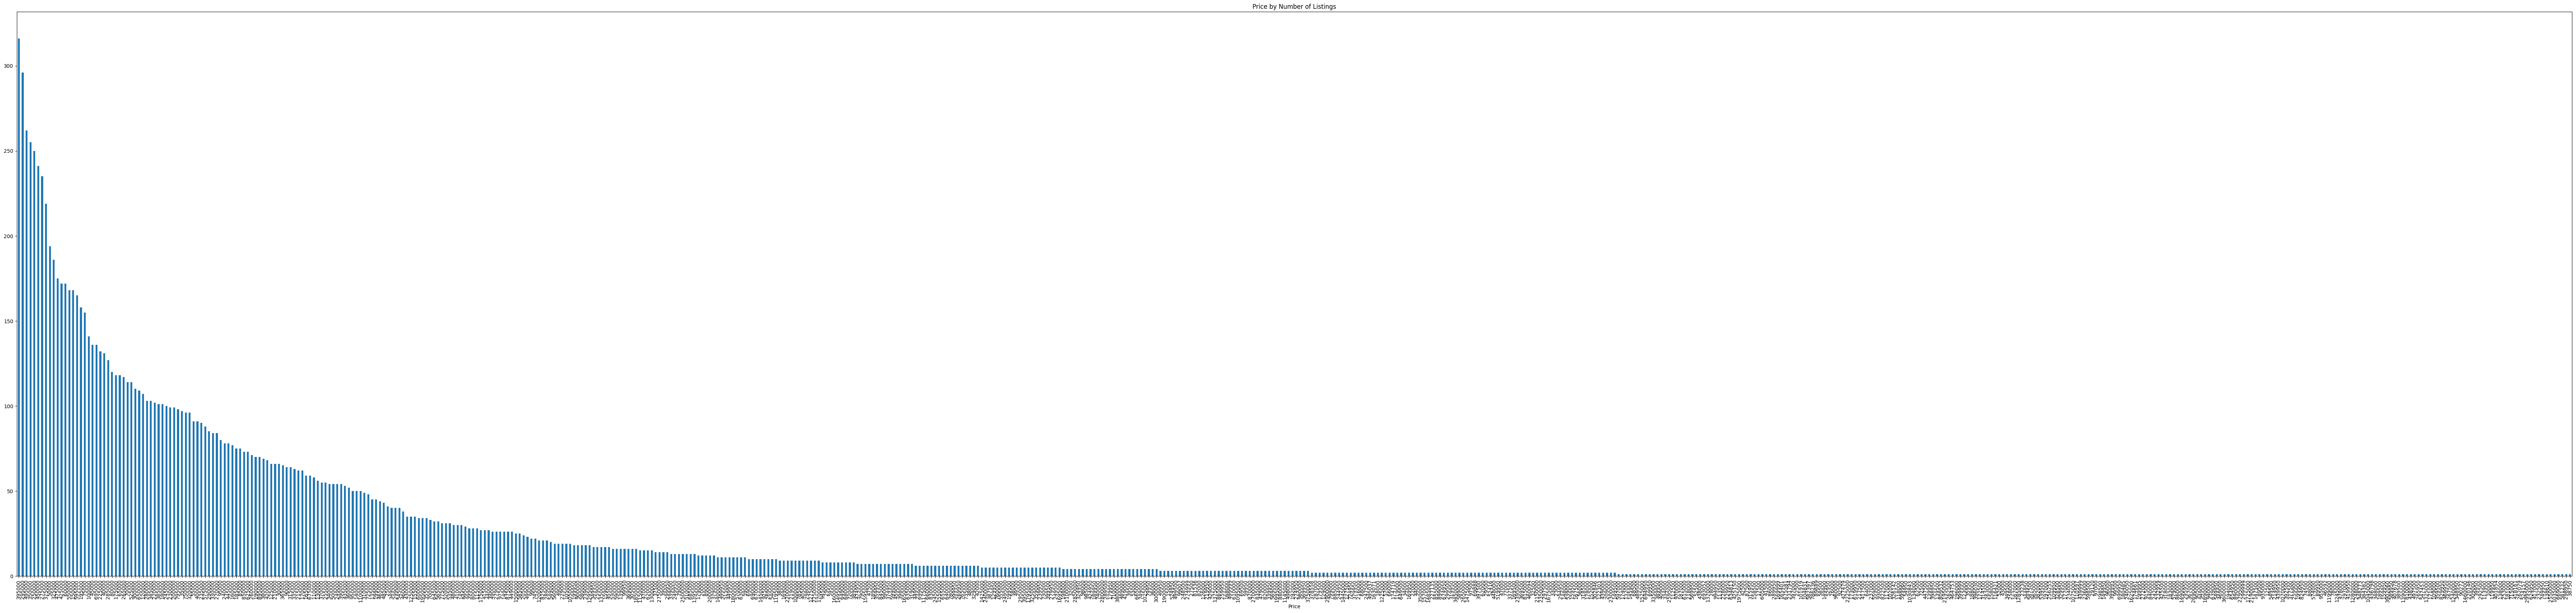

In [15]:
# Price by number of listings
plt.figure(figsize=(90, 20))
df['Price'].value_counts().plot(kind='bar')
plt.title('Price by Number of Listings')
plt.show()

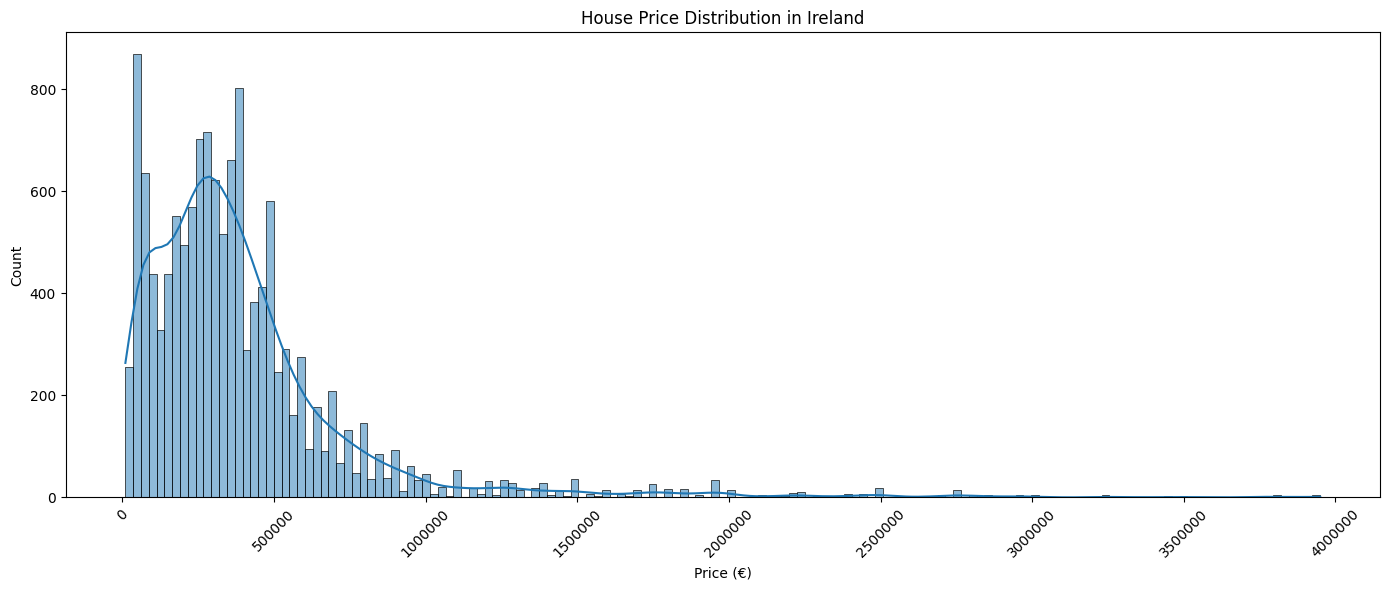

In [16]:
# Price distribution after cleaning : More organised and readable
plt.figure(figsize=(14,6))
sns.histplot(df['Price'], kde=True) # Make changes 3 cells above to change the outlier threshold
plt.ticklabel_format(style = 'plain')
plt.title('House Price Distribution in Ireland')
plt.xlabel('Price (€)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Drop critical nulls
df = df.dropna(subset=['Price', 'Floor Area (m2)', 'Number of Bedrooms', 'Number of Bathrooms', 'Date of Construction'])

In [18]:
# Fill less critical
df['BER Rating'] = df['BER Rating'].fillna('Unknown')
df['Property Type'] = df['Property Type'].fillna('Unknown')
df['Features'] = df['Features'].fillna('Unknown')
df['Area'] = df['Area'].fillna('Unknown')
df['County'] = df['County'].fillna('Unknown')

In [19]:
# Standardize text fields
# 2. Clean text columns
for col in ['Property Type', 'County']:
    df[col] = df[col].str.strip().str.title()
df['BER Rating'] = df['BER Rating'].str.strip().str.upper()

In [20]:
# Create new feature
df['Price_per_m2'] = df['Price'] / df['Floor Area (m2)']

In [21]:
# One-hot encode categoricals
categorical_cols = ['County', 'Property Type', 'BER Rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
# Verifying precscence of nulls
df.isnull().sum()

Title                   0
Price                   0
Number of Bedrooms      0
Number of Bathrooms     0
Property Type           0
Floor Area (m2)         0
BER Rating              0
Latitude                0
Longitude               0
Listing Views           0
Area                    0
County                  0
Features                0
Date of Construction    0
Price_per_m2            0
dtype: int64

In [23]:
# 7 categories based on distribution
df['PriceCategory'] = pd.qcut(df['Price'], q=5, labels=['Low','Medium-Low','Medium','Medium-High','High'])

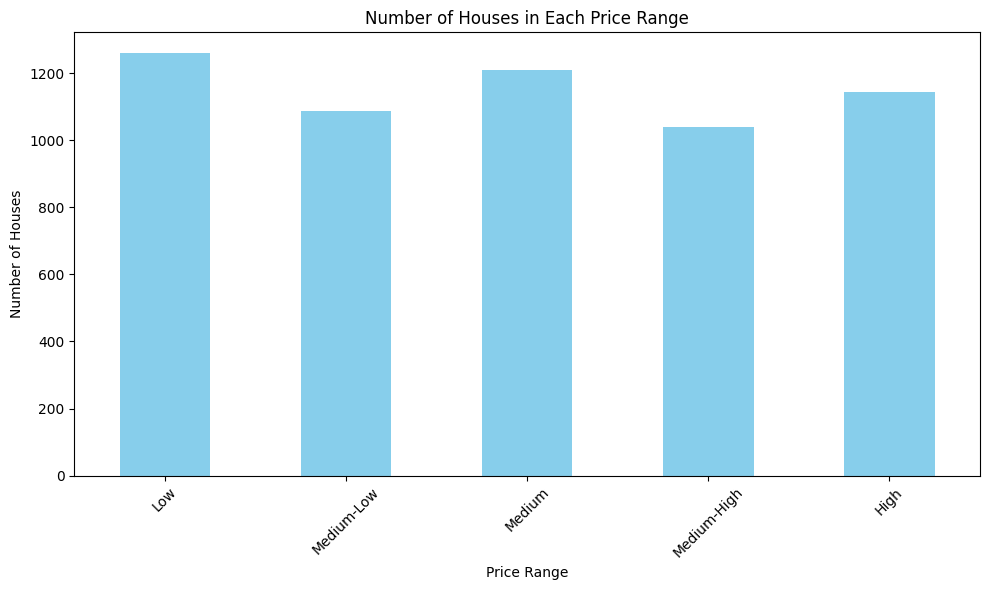

In [24]:
# Visualize the count of houses in each price range
df['PriceCategory'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Houses in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Finding unique values in the 'Property Type' column
df['Property Type'].value_counts()

Property Type
Detached          2337
Semi-D            1101
Apartment          743
Terrace            685
Bungalow           452
End Of Terrace     298
Duplex              69
Townhouse           43
House               10
Studio               2
Name: count, dtype: int64

In [26]:
# Ordinal encoding for 'Property Type'
property_type_order = ['Detached', 'Duplex', 'Townhouse', 'End Of Terrace', 'Semi-D', 'Terrace', 'Bungalow', 'House', 'Apartment', 'Studio']
df['Property Type'] = pd.Categorical(df['Property Type'], categories=property_type_order, ordered=True)
df['Property Type'] = df['Property Type'].cat.codes

In [27]:
# Verifying ordinal encoding of 'Property Type'
df['Property Type'].value_counts()

Property Type
0    2337
4    1101
8     743
5     685
6     452
3     298
1      69
2      43
7      10
9       2
Name: count, dtype: int64

In [28]:
# Finding unique values in the 'BER Rating' column
df['BER Rating'].value_counts()

BER Rating
C2        750
C1        704
B3        670
C3        624
D1        534
D2        523
G         413
E1        324
F         304
E2        267
B2        264
A2        132
A3        124
B1         92
A1         11
SI_666      3
FG          1
Name: count, dtype: int64

In [29]:
# Removing values that are not in the list of BER ratings
df = df[~df['BER Rating'].isin(['SI_666', 'FG'])]

In [30]:
# Ordinal encoding for 'BER Rating'
ber_rating_order = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G']
df['BER Rating'] = pd.Categorical(df['BER Rating'], categories=ber_rating_order, ordered=True)
df['BER Rating'] = df['BER Rating'].cat.codes

In [31]:
# Verifying ordinal encoding of 'BER Rating'
df['BER Rating'].value_counts()

BER Rating
7     750
6     704
5     670
8     624
9     534
10    523
14    413
11    324
13    304
12    267
4     264
1     132
2     124
3      92
0      11
Name: count, dtype: int64

In [32]:
# Finding unique values in the 'County' column
df['County'].value_counts()

County
Dublin       1573
Cork          834
Wexford       351
Galway        350
Wicklow       244
Donegal       227
Mayo          215
Kildare       195
Clare         155
Kerry         148
Meath         135
Unknown       130
Limerick      127
Tipperary     124
Waterford     108
Kilkenny       99
Roscommon      96
Sligo          84
Louth          83
Laois          82
Cavan          77
Offaly         73
Carlow         58
Westmeath      54
Leitrim        52
Monaghan       33
Longford       29
Name: count, dtype: int64

In [33]:
# Ordinal encoding for 'County'
county_order = df['County'].value_counts().index.tolist()  # Get the order based on frequency (Future proofing)
df['County'] = pd.Categorical(df['County'], categories=county_order, ordered=True)
df['County'] = df['County'].cat.codes

In [34]:
# Verifying ordinal encoding of 'County'
df['County'].value_counts()

County
0     1573
1      834
2      351
3      350
4      244
5      227
6      215
7      195
8      155
9      148
10     135
11     130
12     127
13     124
14     108
15      99
16      96
17      84
18      83
19      82
20      77
21      73
22      58
23      54
24      52
25      33
26      29
Name: count, dtype: int64

In [35]:
# Ordinal encoding for 'PriceCategory'
order = ['High', 'Medium-High', 'Medium', 'Medium-Low', 'Low' ]
df['PriceCategory'] = pd.Categorical(df['PriceCategory'], categories=order, ordered=True)
df['PriceCategoryEncoded'] = df['PriceCategory'].cat.codes

In [36]:
# Saving cleaned data to its own csv file
df.to_csv('cleaned_ireland_house_prices.csv', index=False)

In [37]:
# Load the cleaned data to verify
df = pd.read_csv('cleaned_ireland_house_prices.csv')
df.head()

,Title,Price,Number of Bedrooms,Number of Bathrooms,Property Type,Floor Area (m2),BER Rating,Latitude,Longitude,Listing Views,Area,County,Features,Date of Construction,Price_per_m2,PriceCategory,PriceCategoryEncoded
0,"Grey's Corner, Ferrybank, Co. Wexford, Y35XNP4",895000,5,2,0,265.0,5,52.348600,-6.456929,14011.0,ferrybank-wexford,2,Overlooking the River Slaney Estuary & Wexford...,2007.0,3377.358491,High,0
1,"Ballard, Barna, Co. Galway, H91P22T",1250000,4,4,0,333.0,10,53.257378,-9.134137,19535.0,barna-galway,3,Unknown,1978.0,3753.753754,High,0
2,"11 Birchfield Lawn, Dublin 14, Kilmacud, Co. D...",595000,4,1,4,93.0,9,53.291674,-6.231590,4565.0,kilmacud-dublin,0,Four bed home in a prime location - 93sqms / 1...,1983.0,6397.849462,Medium-High,1
3,"41 Monaleen Heights, Castletroy, Limerick City...",565000,4,3,0,178.0,5,52.662889,-8.554347,2309.0,limerick-city,12,"Turnkey Four Bedroom Detached Property, High B...",1980.0,3174.157303,Medium-High,1
4,"48 Elderwood Park, Boreenmanna Road, Ballintem...",295000,2,2,8,88.0,7,51.892087,-8.441552,2489.0,ballintemple-cork,1,"3rd Floor Two Bedroomed Apartment, Great Locat...",2006.0,3352.272727,Medium-Low,3


# Predictive modelling : Classification
Creating a model to classify a property into a price category based on its features

In [38]:
df.dtypes

Title                    object
Price                     int64
Number of Bedrooms        int64
Number of Bathrooms       int64
Property Type             int64
Floor Area (m2)         float64
BER Rating                int64
Latitude                float64
Longitude               float64
Listing Views           float64
Area                     object
County                    int64
Features                 object
Date of Construction    float64
Price_per_m2            float64
PriceCategory            object
PriceCategoryEncoded      int64
dtype: object

In [39]:
# Drop text columns
df.drop(columns=['Title', 'Latitude', 'Longitude', 'Listing Views', 'Area', 'Features'], inplace=True)

In [40]:
# Drop target columns from features
X = df.drop(['Price', 'PriceCategory', 'PriceCategoryEncoded'], axis=1)
y = df['PriceCategoryEncoded']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['High', 'Medium-High', 'Medium', 'Medium-Low', 'Low']))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.94      0.95      0.95       229
 Medium-High       0.86      0.83      0.85       208
      Medium       0.81      0.85      0.83       242
  Medium-Low       0.83      0.81      0.82       217
         Low       0.91      0.92      0.91       252

    accuracy                           0.87      1148
   macro avg       0.87      0.87      0.87      1148
weighted avg       0.87      0.87      0.87      1148

[[218  11   0   0   0]
 [ 12 173  20   0   3]
 [  1  15 206  18   2]
 [  0   1  23 176  17]
 [  0   0   4  17 231]]


- The Random Forest classifier achieved a strong overall accuracy of **87%** in predicting house price categories ranging from "Low" to "High". 
- The classification report indicates that the model performs particularly well on the "High" and "Low" categories, both achieving F1-scores above 0.90, suggesting high reliability in identifying the extremes. 
- However, there is some confusion between adjacent classes such as "Medium", "Medium-High", and "Medium-Low", which is expected due to the ordinal nature of the categories. The use of `class_weight='balanced'` has likely contributed to more equitable performance across all classes. 
- Overall, the model demonstrates robust performance, especially in distinguishing between the lowest and highest price segments.

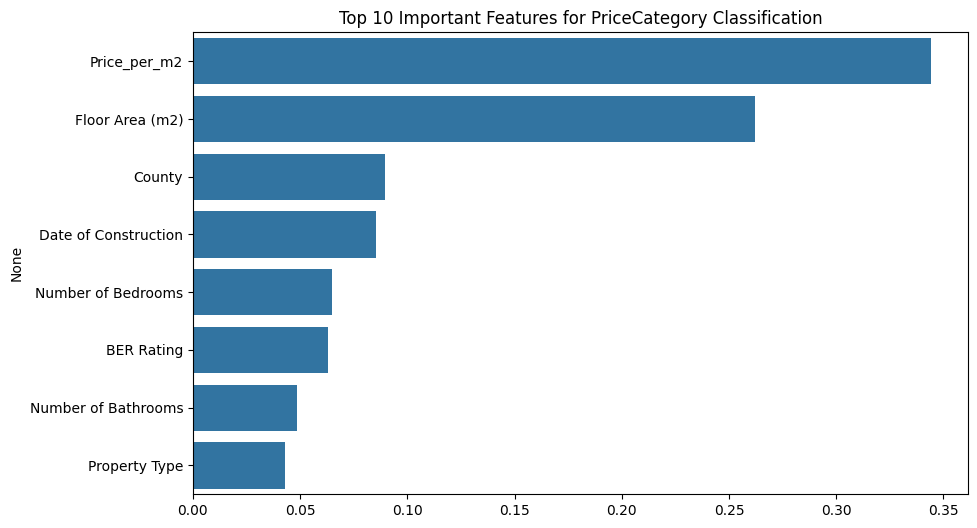

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Important Features for PriceCategory Classification')
plt.show()

# Predictive modelling : Regression
Creating a model to predict price of the property based on its features

In [45]:
# Load the cleaned data to verify
df = pd.read_csv('cleaned_ireland_house_prices.csv')
df.head()

,Title,Price,Number of Bedrooms,Number of Bathrooms,Property Type,Floor Area (m2),BER Rating,Latitude,Longitude,Listing Views,Area,County,Features,Date of Construction,Price_per_m2,PriceCategory,PriceCategoryEncoded
0,"Grey's Corner, Ferrybank, Co. Wexford, Y35XNP4",895000,5,2,0,265.0,5,52.348600,-6.456929,14011.0,ferrybank-wexford,2,Overlooking the River Slaney Estuary & Wexford...,2007.0,3377.358491,High,0
1,"Ballard, Barna, Co. Galway, H91P22T",1250000,4,4,0,333.0,10,53.257378,-9.134137,19535.0,barna-galway,3,Unknown,1978.0,3753.753754,High,0
2,"11 Birchfield Lawn, Dublin 14, Kilmacud, Co. D...",595000,4,1,4,93.0,9,53.291674,-6.231590,4565.0,kilmacud-dublin,0,Four bed home in a prime location - 93sqms / 1...,1983.0,6397.849462,Medium-High,1
3,"41 Monaleen Heights, Castletroy, Limerick City...",565000,4,3,0,178.0,5,52.662889,-8.554347,2309.0,limerick-city,12,"Turnkey Four Bedroom Detached Property, High B...",1980.0,3174.157303,Medium-High,1
4,"48 Elderwood Park, Boreenmanna Road, Ballintem...",295000,2,2,8,88.0,7,51.892087,-8.441552,2489.0,ballintemple-cork,1,"3rd Floor Two Bedroomed Apartment, Great Locat...",2006.0,3352.272727,Medium-Low,3


In [46]:
df.dtypes

Title                    object
Price                     int64
Number of Bedrooms        int64
Number of Bathrooms       int64
Property Type             int64
Floor Area (m2)         float64
BER Rating                int64
Latitude                float64
Longitude               float64
Listing Views           float64
Area                     object
County                    int64
Features                 object
Date of Construction    float64
Price_per_m2            float64
PriceCategory            object
PriceCategoryEncoded      int64
dtype: object

In [47]:
# Drop text columns
df.drop(columns=['Title', 'Latitude', 'Longitude', 'Listing Views', 'Area', 'Features'], inplace=True)

In [48]:
# Drop columns not needed for regression
X = df.drop(['Price', 'PriceCategory', 'PriceCategoryEncoded'], axis=1)
y = df['Price']

In [49]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Evaulating the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  10219.59
RMSE: 43550.73
R²:   0.9870


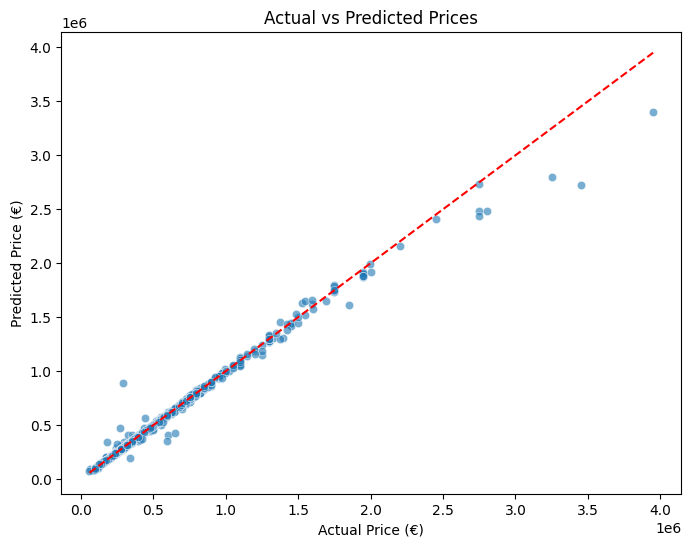

In [52]:
# Visualizing predictions vs actual values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

In [53]:
import joblib
joblib.dump(clf, 'classification_model.pkl')
joblib.dump(reg, 'regression_model.pkl')

['regression_model.pkl']